<a href="https://colab.research.google.com/github/Z1A7AN/Task-6-Data-Science-example/blob/main/Data_Science_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this case, we have to classify consumer complaints into four categories:#

Credit reporting, repair, or other;
Debt collection;
Consumer Loan; and
Mortgage.

#Steps to be followed -#
1. Explanatory Data Analysis and Feature Engineering
2. Text Pre-Processing
3. Selection of Multi Classification model
4. Comparison of model performance
5. Model Evaluation
6. Prediction

First we have to Load the dataset into a pandas DataFrame and Explore the dataset to understand its structure, features, and class distribution.



In [ ]:
import pandas as pd
from google.colab import drive

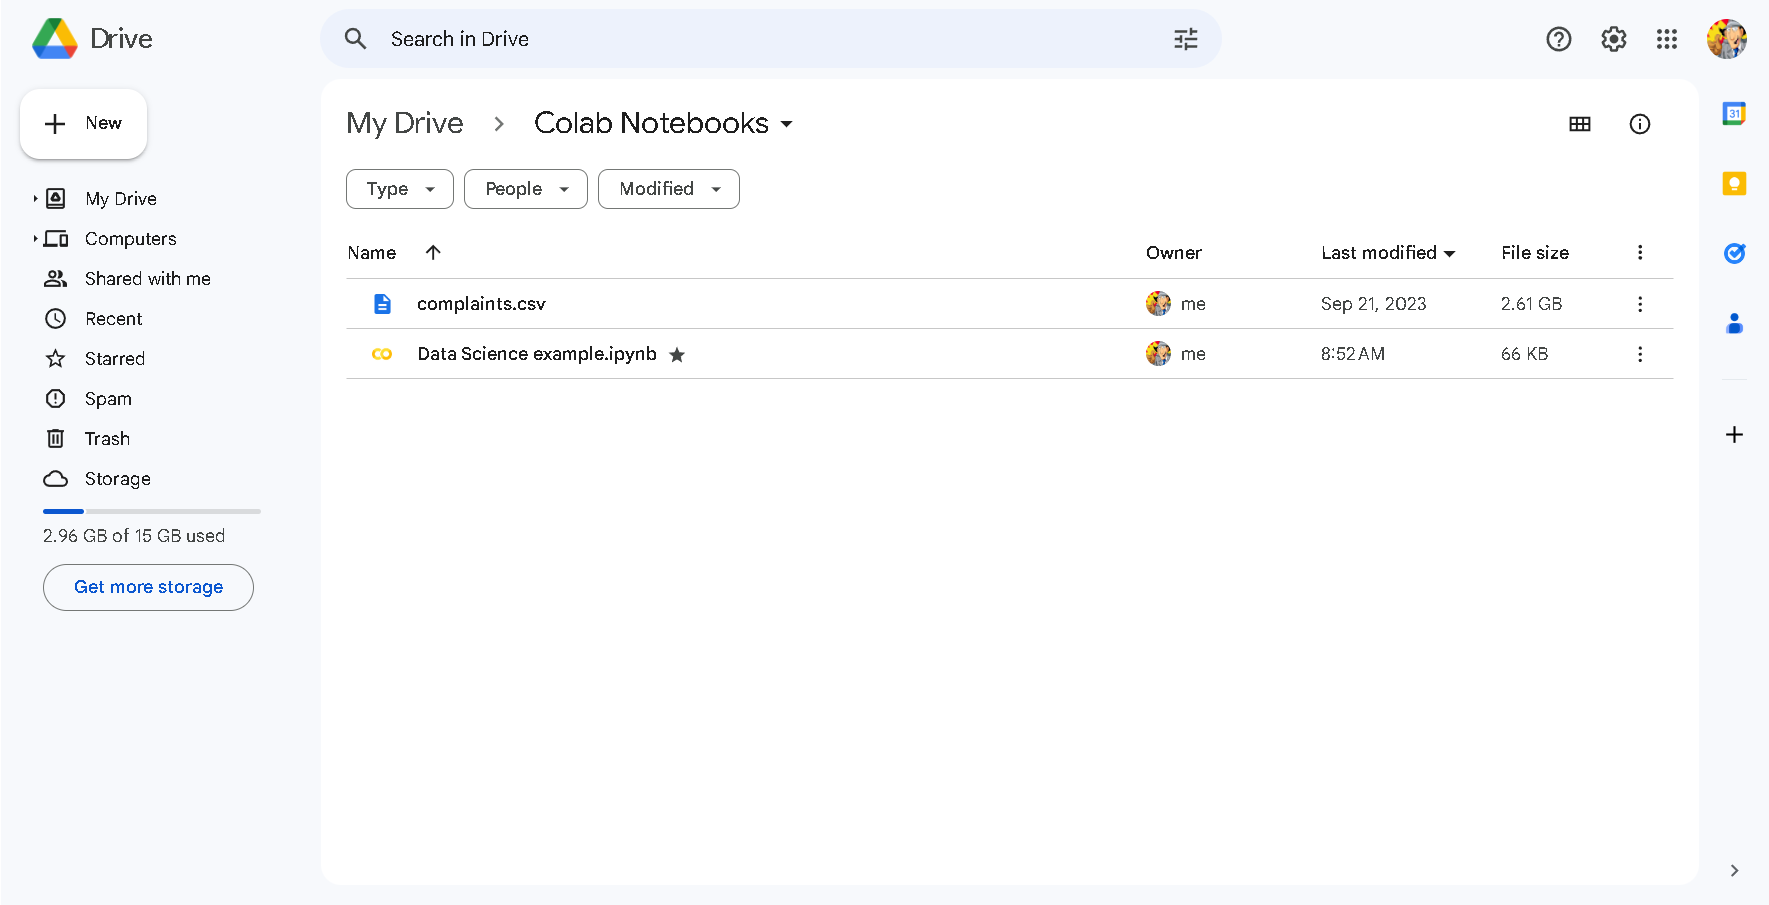

Since its very large file i have uploaded it into drive and mounted it (By using the mount feature in colab)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Perform data cleaning also remove the NaN values and handle missing values. extract relevant information in text data by removing punctuation, stopwords, and performing tokenization and lemmatization.

1.   Data Labeling
2.   Text Pre-Processing
3.   Convert the preprocessed text data into numerical features using techniques like TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
file_path = '/content/drive/MyDrive/complaints.csv'
df = pd.read_csv(file_path)
new = pd.DataFrame(df)
display(new.head(5))

<ipython-input-12-5cadb2e6fa94>:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,NJ,07024,NaN,Other,Web,2023-08-24,In progress,Yes,NaN,7452639
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",FL,33972,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7512160
2,2023-07-13,Checking or savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,Citibank allowed debit card transactions to ov...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,XXXXX,NaN,Consent provided,Web,2023-07-13,Closed with explanation,Yes,NaN,7244354
3,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",FL,33884,Servicemember,NaN,Web,2023-08-25,Closed with non-monetary relief,Yes,NaN,7453721
4,2023-09-13,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",TX,77521,NaN,NaN,Web,2023-09-13,Closed with explanation,Yes,NaN,7542838


#Text Pre-Processing

1.   Remove punctuation, special characters, and numbers.
2.   Performlemmatization to reduce words to their root form.

We are going to take the important colums which makes sense to our text classification

1.   Credit reporting, repair, or other
2.   Debt collection
3.   Consumer Loan
4.   Mortgage

In [ ]:
columns_to_remove = ["Sub-product", "Issue", "Sub-issue", "Company public response", "Company", "Tags", "Consumer consent provided?", "Date sent to company", "Company response to consumer", "Timely response?"]
new = new.drop(columns=columns_to_remove)

2.   Performlemmatization to reduce words to their root form.

In [ ]:
display(new.head(5))
num_rows = len(new)
print("Number of rows:", num_rows)

,Date received,Product,Consumer complaint narrative,State,ZIP code,Submitted via,Consumer disputed?,Complaint ID
0,2023-08-24,"Credit reporting, credit repair services, or o...",NaN,NJ,07024,Web,NaN,7452639
1,2023-08-25,Credit reporting or other personal consumer re...,NaN,FL,33972,Web,NaN,7512160
2,2023-07-13,Checking or savings account,Citibank allowed debit card transactions to ov...,TX,XXXXX,Web,NaN,7244354
3,2023-08-25,Credit reporting or other personal consumer re...,NaN,FL,33884,Web,NaN,7453721
4,2023-09-13,Credit reporting or other personal consumer re...,NaN,TX,77521,Web,NaN,7542838


Number of rows: 4091495


In [ ]:
x = pd.DataFrame(df.isnull().sum()) #

We are now using the data

In [ ]:
display(x)#

,0
Date received,0
Product,0
Sub-product,235291
Issue,0
Sub-issue,716727
Consumer complaint narrative,2608933
Company public response,2196051
Company,0
State,43234
ZIP code,30213


In [ ]:
newdf = new.dropna()
num_rows12 = len(newdf)
print("Number of rows:", num_rows12)

Number of rows: 163575


In [ ]:
display(new.head(10))

,Date received,Product,Consumer complaint narrative,State,ZIP code,Submitted via,Consumer disputed?,Complaint ID
0,2023-08-24,"Credit reporting, credit repair services, or o...",NaN,NJ,07024,Web,NaN,7452639
1,2023-08-25,Credit reporting or other personal consumer re...,NaN,FL,33972,Web,NaN,7512160
2,2023-07-13,Checking or savings account,Citibank allowed debit card transactions to ov...,TX,XXXXX,Web,NaN,7244354
3,2023-08-25,Credit reporting or other personal consumer re...,NaN,FL,33884,Web,NaN,7453721
4,2023-09-13,Credit reporting or other personal consumer re...,NaN,TX,77521,Web,NaN,7542838
5,2023-09-12,Credit card,NaN,IN,46845,Web,NaN,7529774
6,2023-06-13,"Credit reporting, credit repair services, or o...",I submitted a letter to the XXXX Credit Bureau...,FL,32221,Web,NaN,7108471
7,2023-09-11,Credit card,NaN,WI,53045,Web,NaN,7533001
8,2023-09-11,Credit card,NaN,CA,91745,Web,NaN,7532158
9,2023-08-14,Checking or savings account,NaN,TX,78731,Web,NaN,7398959


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
X = newdf['Consumer complaint narrative']
y = newdf['Product']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

Bank account or service       0.78      0.80      0.79      4316
          Consumer Loan       0.83      0.49      0.62      2829
            Credit card       0.76      0.76      0.76      5691
       Credit reporting       0.81      0.85      0.83      9547
        Debt collection       0.78      0.86      0.82     11863
        Money transfers       0.85      0.21      0.34       443
               Mortgage       0.87      0.95      0.91      9876
Other financial service       0.00      0.00      0.00       103
            Payday loan       0.84      0.07      0.14       515
           Prepaid card       0.83      0.11      0.19       444
           Student loan       0.90      0.83      0.86      3442
       Virtual currency       0.00      0.00      0.00         4

               accuracy                           0.81     49073
              macro avg       0.69      0.49      0.52     49073
           weighted avg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 3443    24   359   100   144     8   221     0     0     9     8     0]
 [   66  1394   208   244   502     0   350     0     6     0    59     0]
 [  283    17  4352   394   510     1   113     0     0     1    20     0]
 [   23    54   224  8135   926     0   153     0     0     0    32     0]
 [   51   111   207   878 10185     0   295     0     1     0   135     0]
 [  225     7    61     5    31    95    19     0     0     0     0     0]
 [   74     7    67   179   186     0  9356     0     0     0     7     0]
 [   25     0     8     2    30     6    15     0     0     0    17     0]
 [   39    54    17    17   253     0    78     0    38     0    19     0]
 [  197     1   173     1    16     2     3     0     0    49     2     0]
 [   14     2    26   117   307     0   130     0     0     0  2846     0]
 [    2     0     1     0     1     0     0     0     0     0     0     0]]


In [ ]:
classifiers = [
    MultinomialNB(),
    SVC(),
    RandomForestClassifier(),
    LogisticRegression(max_iter=1000)]

In [ ]:
for classifier in classifiers:
    classifier.fit(X_train_tfidf, y_train)
    y_pred = classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Classifier: MultinomialNB
Accuracy: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

Bank account or service       0.78      0.80      0.79      4316
          Consumer Loan       0.83      0.49      0.62      2829
            Credit card       0.76      0.76      0.76      5691
       Credit reporting       0.81      0.85      0.83      9547
        Debt collection       0.78      0.86      0.82     11863
        Money transfers       0.85      0.21      0.34       443
               Mortgage       0.87      0.95      0.91      9876
Other financial service       0.00      0.00      0.00       103
            Payday loan       0.84      0.07      0.14       515
           Prepaid card       0.83      0.11      0.19       444
           Student loan       0.90      0.83      0.86      3442
       Virtual currency       0.00      0.00      0.00         4

               accuracy                           0.81     49073
              macro avg       0.69      0.49      0.52     49073
           weighted avg